In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data =sm.datasets.fair.load_pandas().data

In [3]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
data['affair'] = (data.affairs >0).astype(int)

In [5]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [15]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


In [7]:
data.groupby(['rate_marriage'])['affair'].mean()

rate_marriage
1.0    0.747475
2.0    0.635057
3.0    0.550856
4.0    0.322926
5.0    0.181446
Name: affair, dtype: float64

From the above stats we can see that women who rates their marriage as low has high probability that they are having affair.

In [8]:
data.groupby(['rate_marriage']).mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0, 0.5, 'Frequency')

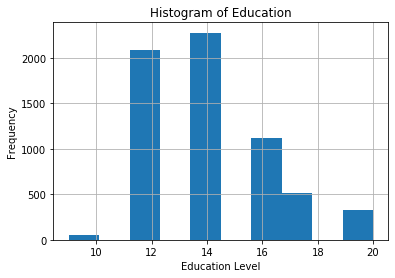

In [10]:
data['educ'].hist()
plt.title("Histogram of Education")
plt.xlabel("Education Level")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

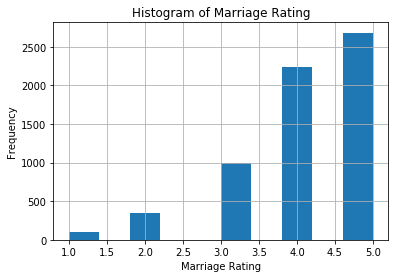

In [11]:
data['rate_marriage'].hist()
plt.title("Histogram of Marriage Rating")
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")

In [12]:
import seaborn as sns

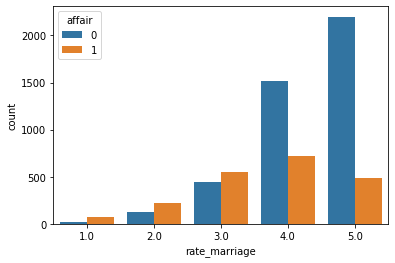

In [13]:
sns.countplot(data['rate_marriage'],hue=data['affair'])

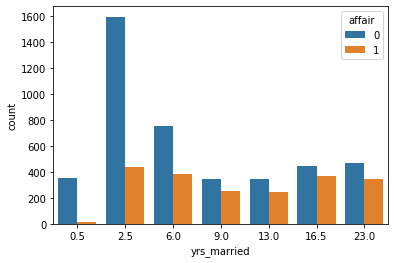

In [14]:
sns.countplot(data['yrs_married'],hue=data['affair'])

In [17]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


In [20]:
y = data['affair']
X = data.drop(['affair'],axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 355)

In [26]:
classifier = LogisticRegression()

In [27]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)

In [33]:
print("Model accuracy on Training data : {}".format(classifier.score(X_train,y_train)))
print("Model accuracy on Test data : {}".format(classifier.score(X_test,y_test)))
#print("Model accuracy on Test data : {}".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,y_pred)))
print("Classification Report :\n {}".format(classification_report(y_test,y_pred)))

Model accuracy on Training data : 0.9573608617594255
Model accuracy on Test data : 0.9591623036649215
Confusion Matrix :
 [[1288    0]
 [  78  544]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1288
           1       1.00      0.87      0.93       622

    accuracy                           0.96      1910
   macro avg       0.97      0.94      0.95      1910
weighted avg       0.96      0.96      0.96      1910



In [35]:
classifier.score(X,y)# Accuracy without data scaling 

0.8099277411247251

In [42]:
classifier.score(X_scaled,y)# Accuracy with data scaling 

0.9579013509267986

In [40]:
scores = cross_val_score(LogisticRegression(),X_scaled,y,scoring='accuracy',cv=10)

In [41]:
print(scores)

[0.97017268 0.96075353 0.96232339 0.95290424 0.96703297 0.95290424
 0.9591195  0.96540881 0.96698113 0.96698113]


Overall our model looks good with 95% accuracy level and it is ready for prediction.